# Relax and hold steady - Stokes Flow in vorticity-streamfunction formulation

## Introduction théorique

### Vorticité

En commençant par l'équation de Navier Stokes
$$\frac{\partial u}{\partial t}+u.\nabla u=-\frac{1}{\rho}\nabla\rho+\nu\nabla^2u$$
où $u$ et $p$ sont respectivement des vitesses et pressions adimentionnelles, nous pouvons - en supposant que le nombre de Reynolds correspondant aux conditions approche zéro et en définissant la vorticité
$$\omega=\nabla\times u$$ -
en retirer l'équation de Laplace suivante
$$\nabla^2\omega=0$$

### Fonction de courant

Définissons la fonction de courant $\psi$ telle que
$$\frac{\partial\psi}{\partial y}=u~~~~~~~~~~~~-\frac{\partial\psi}{\partial x}=v$$

A deux dimensions, la vorticité pourra alors s'écrire
$$\omega=\frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}$$

Ceci donnant finalement un système de deux équations différentielles couplées :
$$\nabla^2\psi=-\omega$$
$$\nabla^2\omega=0$$

## Analyse numérique par la méthode de Laplace.

In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Commençons par implémenter
les données livrées par l'énoncé

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

Nous définissons d'une part la fonction L1norm, qui donnera la norme L1 de la différence entre un tabelau et un autre, fonction requise pour le calcul du critère de convergence. Aussi nous définissons une fonction qui nous permettra de visualiser nos données sous forme d'un gaphique en trois dimensions

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

def plot_3D(x, y, p):
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

Enfin nous implémentons les conditions initiales du problème

In [4]:
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)
O = numpy.zeros((ny,nx)) #omega
P = numpy.zeros((ny,nx)) #psi
O[-1,:] = (-0.5/(dy**2))*(8*P[-2,:]-P[-3,:])-(3/dy)

Maintenant, créons une fonction qui ittérera la méthode de Jacobi jusqu'à ce que le critère en norme L1 soit atteint.

In [5]:
def laplace2d(O, P, dx, dy, l1_target):
    
    Onorm = 1
    Pnorm = 1
    o = numpy.zeros((ny,nx))
    p = numpy.zeros((ny,nx))
    N = 0
    
    while Onorm > l1_target and Pnorm > l1_target:
        o = O.copy()
        p = P.copy()
        
        O[1:-1,1:-1] = 0.25 * (o[1:-1,2:] + o[1:-1, :-2] + o[2:, 1:-1] + o[:-2, 1:-1]) #Jacobi
    
        
        O[-1,:] = -0.5/(dy**2)*(8*P[-2,:]-P[-3,:])-(3/dy) #On force les conditions auc bords
        O[0,:] = -0.5/(dy**2)*(8*P[1,:]-P[2,:])
        O[:,-1] = -0.5/(dy**2)*(8*P[:,-2]-P[:,-3])
        O[:,0] = -0.5/(dy**2)*(8*P[:,1]-P[:,2])
        
        P[1:-1,1:-1] = 0.25 * (p[1:-1,2:] + p[1:-1,:-2] + p[2:,1:-1] + p[:-2,1:-1] + O[1:-1,1:-1] * dx**2)
        
        Onorm  = L1norm(O,o)
        Pnorm = L1norm(P,p)
        N = N+1

    return O, P, N

In [6]:
O, P, N = laplace2d(O.copy(), P.copy(), dx, dy, l1_target)

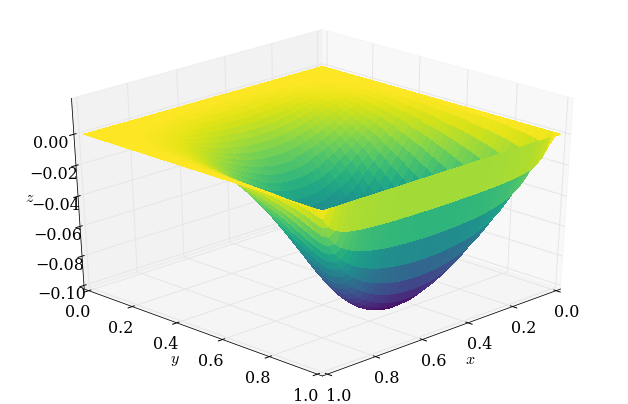

In [7]:
plot_3D(x,y,P)

In [8]:
numpy.max(numpy.abs(P))

0.099844725863709183

In [9]:
numpy.max(numpy.abs(O))

78.192660960145787

In [10]:
numpy.round(P[32,::8],4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])